## Packages and modules

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from google.colab import files
# try:
#   import dabl
# except:
#   !pip install dabl
#   import dabl
# try:
#   import sweetviz as sv
# except:
#     !pip install sweetviz
#     import sweetviz as sv
# from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/Twitter-ABA-Sentiment/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Twitter-ABA-Sentiment


In [2]:
# uploaded = files.upload()
raw_data = pd.read_csv('aba_twitter_scrape_sentiment.csv')
df_clean = raw_data.copy()
df_clean = df_clean.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_clean.head()

,Unnamed: 0.1,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,focus,neg,neu,pos,compound,neg_e,neu_e,pos_e,compound_e
0,0,snscrape.modules.twitter.Tweet,https://twitter.com/WhtIStheSCIENCE/status/141...,2021-07-24 21:42:57+00:00,😂😂😂 #behaviortwitter https://t.co/Rz4kuzC6Ms,😂😂😂 #behaviortwitter twitter.com/itsbkumar056/s…,1.419050e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1.419050e+18,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,['https://twitter.com/itsbkumar056/status/1418...,['https://t.co/Rz4kuzC6Ms'],NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",['behaviortwitter'],NaN,behaviortwitter,0.0,1.000,0.000,0.0000,0.0,1.000,0.000,0.0000
1,1,snscrape.modules.twitter.Tweet,https://twitter.com/WhtIStheSCIENCE/status/141...,2021-07-24 20:42:41+00:00,Amazing #behaviortwitter !! 👊🏽👊🏽 https://t.co/...,Amazing #behaviortwitter !! 👊🏽👊🏽 twitter.com/N...,1.419035e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,1.419035e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,['https://twitter.com/NicoleGravina/status/141...,['https://t.co/uqWIVRIkRM'],NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",['behaviortwitter'],NaN,behaviortwitter,0.0,0.477,0.523,0.6580,0.0,0.646,0.354,0.6580
2,2,snscrape.modules.twitter.Tweet,https://twitter.com/WhtIStheSCIENCE/status/141...,2021-07-24 17:55:21+00:00,…when you get in the club the first person you...,…when you get in the club the first person you...,1.418993e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1.418993e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",['behaviortwitter'],NaN,behaviortwitter,0.0,1.000,0.000,0.0000,0.0,1.000,0.000,0.0000
3,3,snscrape.modules.twitter.Tweet,https://twitter.com/cheagarcia/status/14189784...,2021-07-24 16:56:30+00:00,Which articles on behavior analysis and open s...,Which articles on behavior analysis and open s...,1.418978e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,1,2,0,1.418978e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Gif', 'th...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['BehaviorTwitter'],NaN,behaviortwitter,0.0,0.872,0.128,0.3612,0.0,0.872,0.128,0.3612
4,4,snscrape.modules.twitter.Tweet,https://twitter.com/WhtIStheSCIENCE/status/141...,2021-07-24 05:51:30+00:00,So much truth #behaviortwitter https://t.co/EH...,So much truth #behaviortwitter twitter.com/bur...,1.418811e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,0,1.418811e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,['https://twitter.com/burrhusfskinner/status/1...,['https://t.co/EHu3JEFpuX'],NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",['behaviortwitter'],NaN,behaviortwitter,0.0,0.608,0.392,0.3774,0.0,0.608,0.392,0.3774


## Playing with dabl

In [ ]:
df_clean = dabl.clean(data, verbose=1)

Detected feature types:
continuous      10
dirty_float      5
low_card_int     0
categorical      7
date             0
free_string     13
useless          4
dtype: int64


## Clean-up some features

In [ ]:
df_clean = df_clean.drop(['Unnamed: 0.1_ @PMOIndia @AmitShah @drharshvardhan @IMAIndiaOrg @ANI',\
                         'Unnamed: 0.1_#MedTwitter #MedStudentTwitter #MedEd #AcademicChatter #AcademicTwitter',\
                         'Unnamed: 0.1_#MedTwitter #PeruvianPhysiciansCrew',\
                         'Unnamed: 0.1_#SelfDefenceIsLegal',
                         'Unnamed: 0.1_#たてたてよこよこ横山結衣 #ディズニーランド #Disney #初調査員 #あべこうじ #横山結衣 #中村かさね #藤原祐輝 #木邨将太 #服部未佳 #土曜日 #９時３５分 #青森 #夢はここから #生放送 #ハッピィ #土曜日 #9時35分 #ABA #青森朝日放送 #aomori https://t.co/On0xqhbqoX',
                         'Unnamed: 0.1_1-70 dias', 'Unnamed: 0.1_1-dos meses ',
                         'Unnamed: 0.1_1-tres meses ', 'Unnamed: 0.1_2-Maracay Estado Aragua ',
                         'Unnamed: 0.1_3- #ABA cantv reporte No 19650849',
                         'Unnamed: 0.1_3- #ABA cantv reporte No 19650849 l',
                         "Unnamed: 0.1_D govt they're waiting on for help is actually d one killing them",
                         'Unnamed: 0.1_cortados durante la Cuarentena. Nos engañan o que?',
                         'Unnamed: 0.1_por falta de pago. Y no hay manera de pagarlo xqse debe pagar en Zoom y ellos no estan trabajando. ES UN ABUSO DE CANTV',
                         'Unnamed: 0.1_dabl_continuous'], axis=1)

# Save it
df_clean.to_csv('aba_twitter_sentiment_dabl_clean.csv')

In [2]:
# If picking up fresh
raw_data = pd.read_csv('aba_twitter_sentiment_dabl_clean.csv')
df_clean = raw_data.copy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_clean = df_clean.drop(['Unnamed: 0'], axis=1)

## Quick plots

Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 219 outliers in column pos.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 273 outliers in column pos_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 788 outliers in column neg.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 789 outliers in column neg_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 100 outliers in column neu.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 118 outliers in column neu_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: U

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72a238fc50>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72a04866d0>,
       dtype=object)]

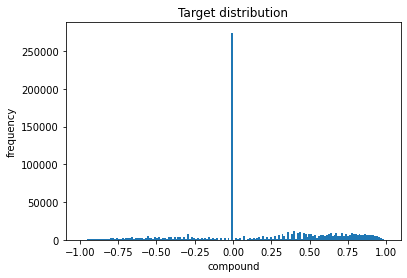

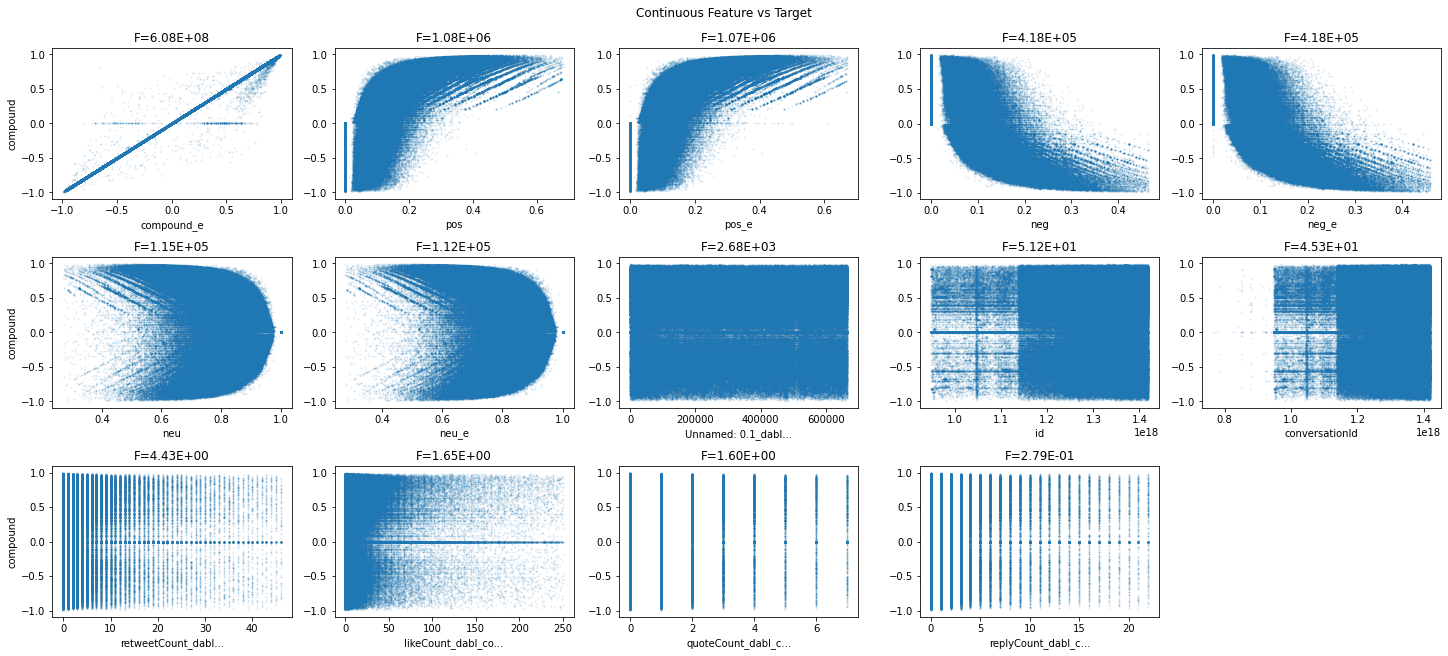

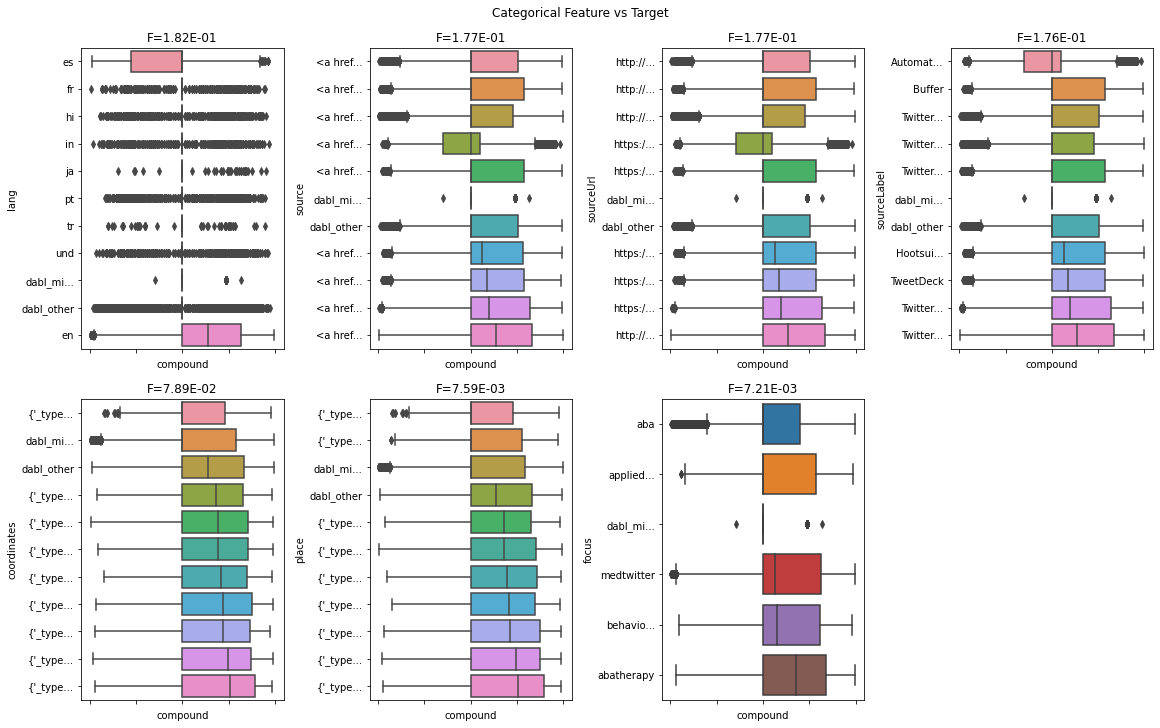

In [8]:
# All data
dabl.plot(df_clean, target_col='compound')

In [9]:
# Isolate bx Twitter
df_bx = df_clean[df_clean['focus']!= 'medtwitter']

     |████████████████████████████████| 558 kB 8.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 50 outliers in column pos.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 70 outliers in column pos_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 169 outliers in column neg_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 179 outliers in column neg.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 47 outliers in column neu.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 54 outliers in column neu_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserW

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72abd59a10>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ad676890>,
       dtype=object)]

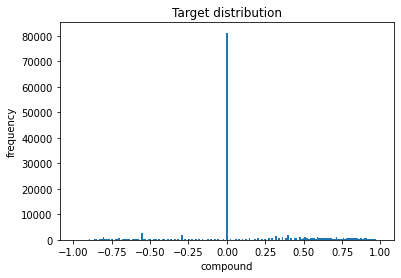

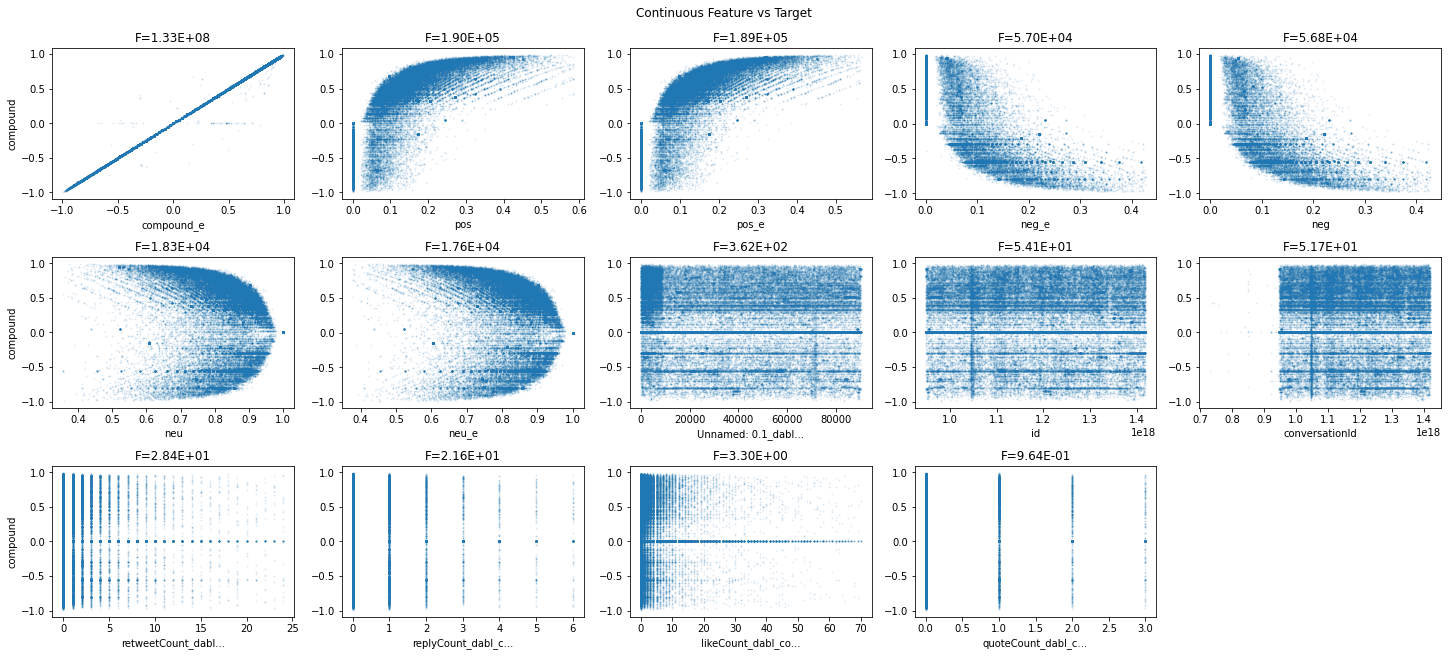

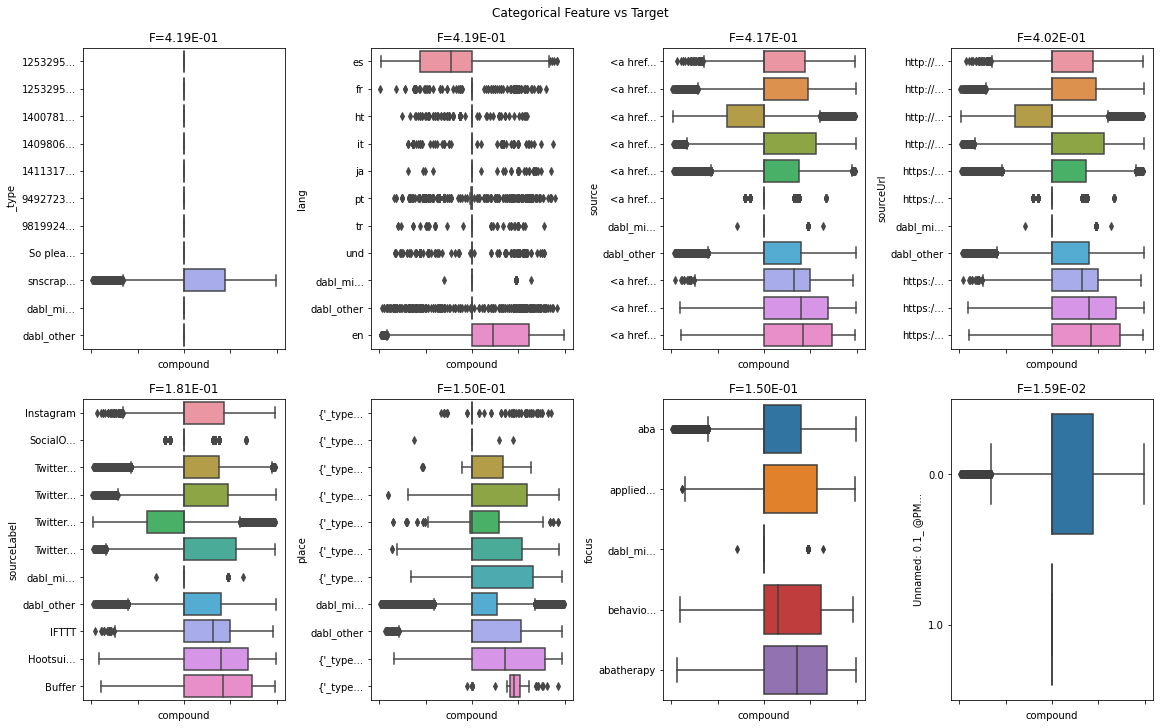

In [7]:
# Bx twitter only
dabl.plot(df_bx, target_col='compound')

In [3]:
# Medtwitter
df_med = df_clean[df_clean['focus']== 'medtwitter']

['_type',
 'url',
 'date',
 'content',
 'renderedContent',
 'id',
 'user',
 'replyCount',
 'retweetCount',
 'likeCount',
 'quoteCount',
 'conversationId',
 'lang',
 'source',
 'sourceUrl',
 'sourceLabel',
 'outlinks',
 'tcooutlinks',
 'media',
 'retweetedTweet',
 'quotedTweet',
 'inReplyToTweetId',
 'inReplyToUser',
 'mentionedUsers',
 'coordinates',
 'place',
 'hashtags',
 'cashtags',
 'focus',
 'neg',
 'neu',
 'pos',
 'compound',
 'neg_e',
 'neu_e',
 'pos_e',
 'compound_e']

In [5]:
df_med = df_med.drop(['_type', 'url','id', 'user', 'conversationId','source',
                      'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
                      'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
                      'inReplyToUser', 'hashtags', 'cashtags'], axis=1)

In [31]:
for i in list(df_med):
  print(i, df_med[i].unique(), "\n")

date <DatetimeArray>
['2021-07-24 23:59:38+00:00', '2021-07-24 23:58:03+00:00',
 '2021-07-24 23:51:39+00:00', '2021-07-24 23:48:51+00:00',
 '2021-07-24 23:48:23+00:00', '2021-07-24 23:46:48+00:00',
 '2021-07-24 23:45:53+00:00', '2021-07-24 23:35:05+00:00',
 '2021-07-24 23:34:37+00:00', '2021-07-24 23:34:03+00:00',
 ...
 '2019-06-07 01:32:40+00:00', '2019-06-07 01:32:39+00:00',
 '2019-06-07 01:31:30+00:00', '2019-06-07 01:29:41+00:00',
 '2019-06-07 01:27:28+00:00', '2019-06-07 01:15:02+00:00',
 '2019-06-07 01:12:51+00:00', '2019-06-07 01:08:28+00:00',
 '2019-06-07 01:06:16+00:00', '2019-06-07 00:59:22+00:00']
Length: 656445, dtype: datetime64[ns, UTC] 

content ['It might interest you that, there is youssef syndrome, a triad of haematuria, amenorrhoea and cyclical menouria with leakage of urine secondary to abnormal connection between the uterus and bladder..\n\n#MedTwitter #Yousef #BBNaijaShineYaEye #BBNaijaSeason6'
 'Cureus | Anophthalmia, Global Developmental Delay, and Severe Dyspha

In [32]:
# Cleanup some of the count features
int_list = ['replyCount', 'retweetCount', 'likeCount', 'quoteCount']

for i in int_list:
  df_med[i] = df_med[i].astype(float)

Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 165 outliers in column pos.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 176 outliers in column pos_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 602 outliers in column neg.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 628 outliers in column neg_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 61 outliers in column neu.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 66 outliers in column neu_e.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: Use

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94b0ef0510>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94b0dd3910>,
       dtype=object)]

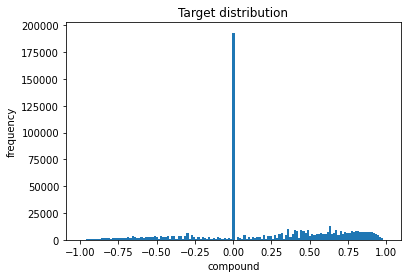

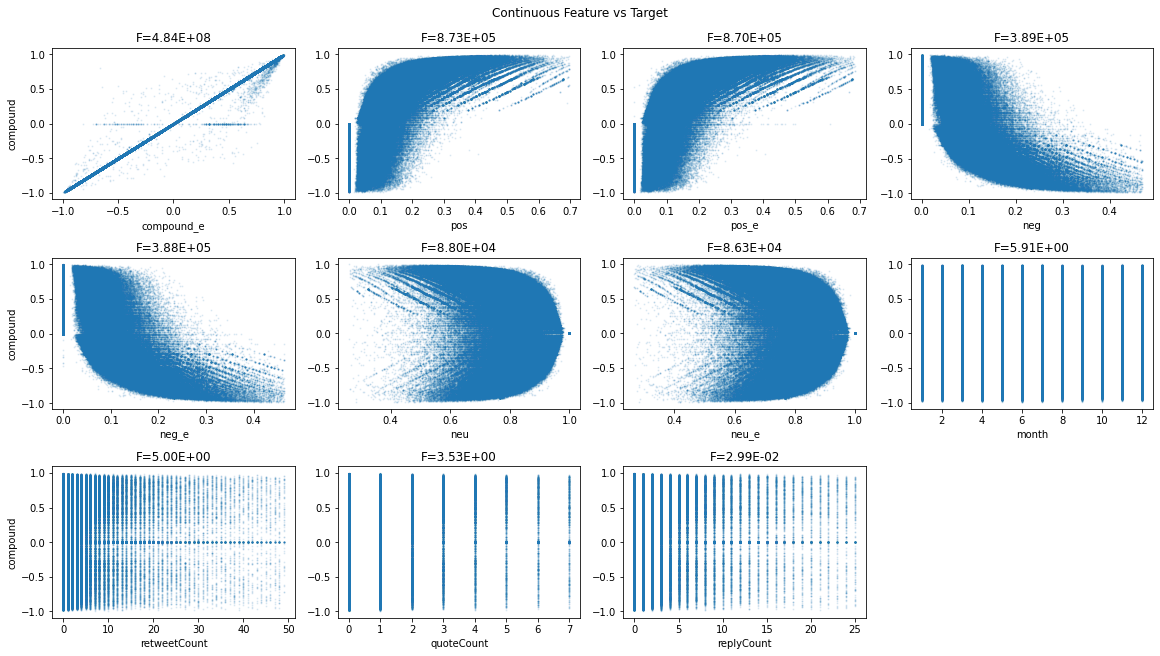

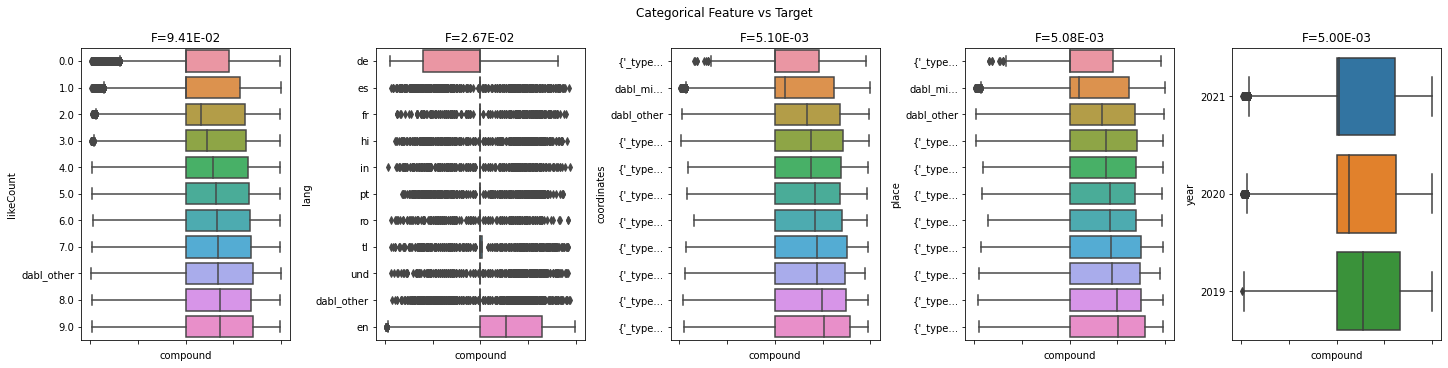

In [33]:
# Plot it
dabl.plot(df_med, target_col='compound')

([<matplotlib.axis.YTick at 0x7f94a5399cd0>,
 <a list of 5 Text major ticklabel objects>)

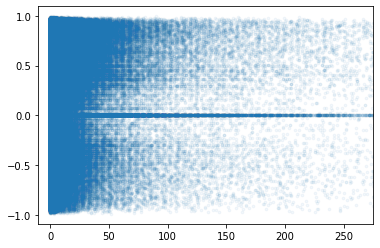

In [47]:
plt.scatter(x=df_med['likeCount'], y=df_med['compound'], s=7, alpha=0.05)
plt.xlim(-10, 275)
plt.yticks(ticks=[-1, -0.5, 0, 0.5, 1])

## Tweets with and without emoji conversion to text

In [53]:
df_trimmed = df_clean[['pos', 'neu', 'neg', 'compound', 
                      'pos_e', 'neu_e', 'neg_e', 'compound_e']]
df_trimmed = df_trimmed.reset_index(drop=True)

In [55]:
keep = []

for i in range(len(df_trimmed)):
  if df_trimmed['pos'][i] - df_trimmed['pos_e'][i]==0:
    if df_trimmed['neu'][i] - df_trimmed['neu_e'][i]==0:
      if df_trimmed['neg'][i] - df_trimmed['neg_e'][i]==0:
        if df_trimmed['compound'][i] - df_trimmed['compound_e'][i]==0:
          keep.append('no')
        else:
          keep.append("yes")
      else:
          keep.append("yes")
    else:
          keep.append("yes")
  else:
    keep.append("yes")

df_trimmed['keep'] = keep

In [56]:
df_trimmed = df_trimmed[df_trimmed['keep']=='yes']
df_trimmed = df_trimmed.drop(['keep'], axis=1)
df_trimmed = df_trimmed.reset_index(drop=True)

In [57]:
len(df_trimmed)

91638

In [59]:
# Functions we need
# Functions
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm", \
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction", ha='center', \
                va='center', fontsize=font_size)

def annotate_colname(x, **kws):
    ax = plt.gca()
    ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes, fontweight='bold')

def reg_plot(df,y,x,title=None,x_label=None,y_label=None,save_name=None, y_max=None, y_min=None):
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.regplot(x=x, 
                     y=y, 
                     data=df, 
                     color='k')
    sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=True, trim=False)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.set_ylabel(f'{y_label}', fontsize=20)
    ax.set_xlabel(f'{x_label}',fontsize=20)
    ax.set_ylim([y_min,y_max])
    # plt.suptitle(f'{title}')
    # plt.tight_layout()
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()

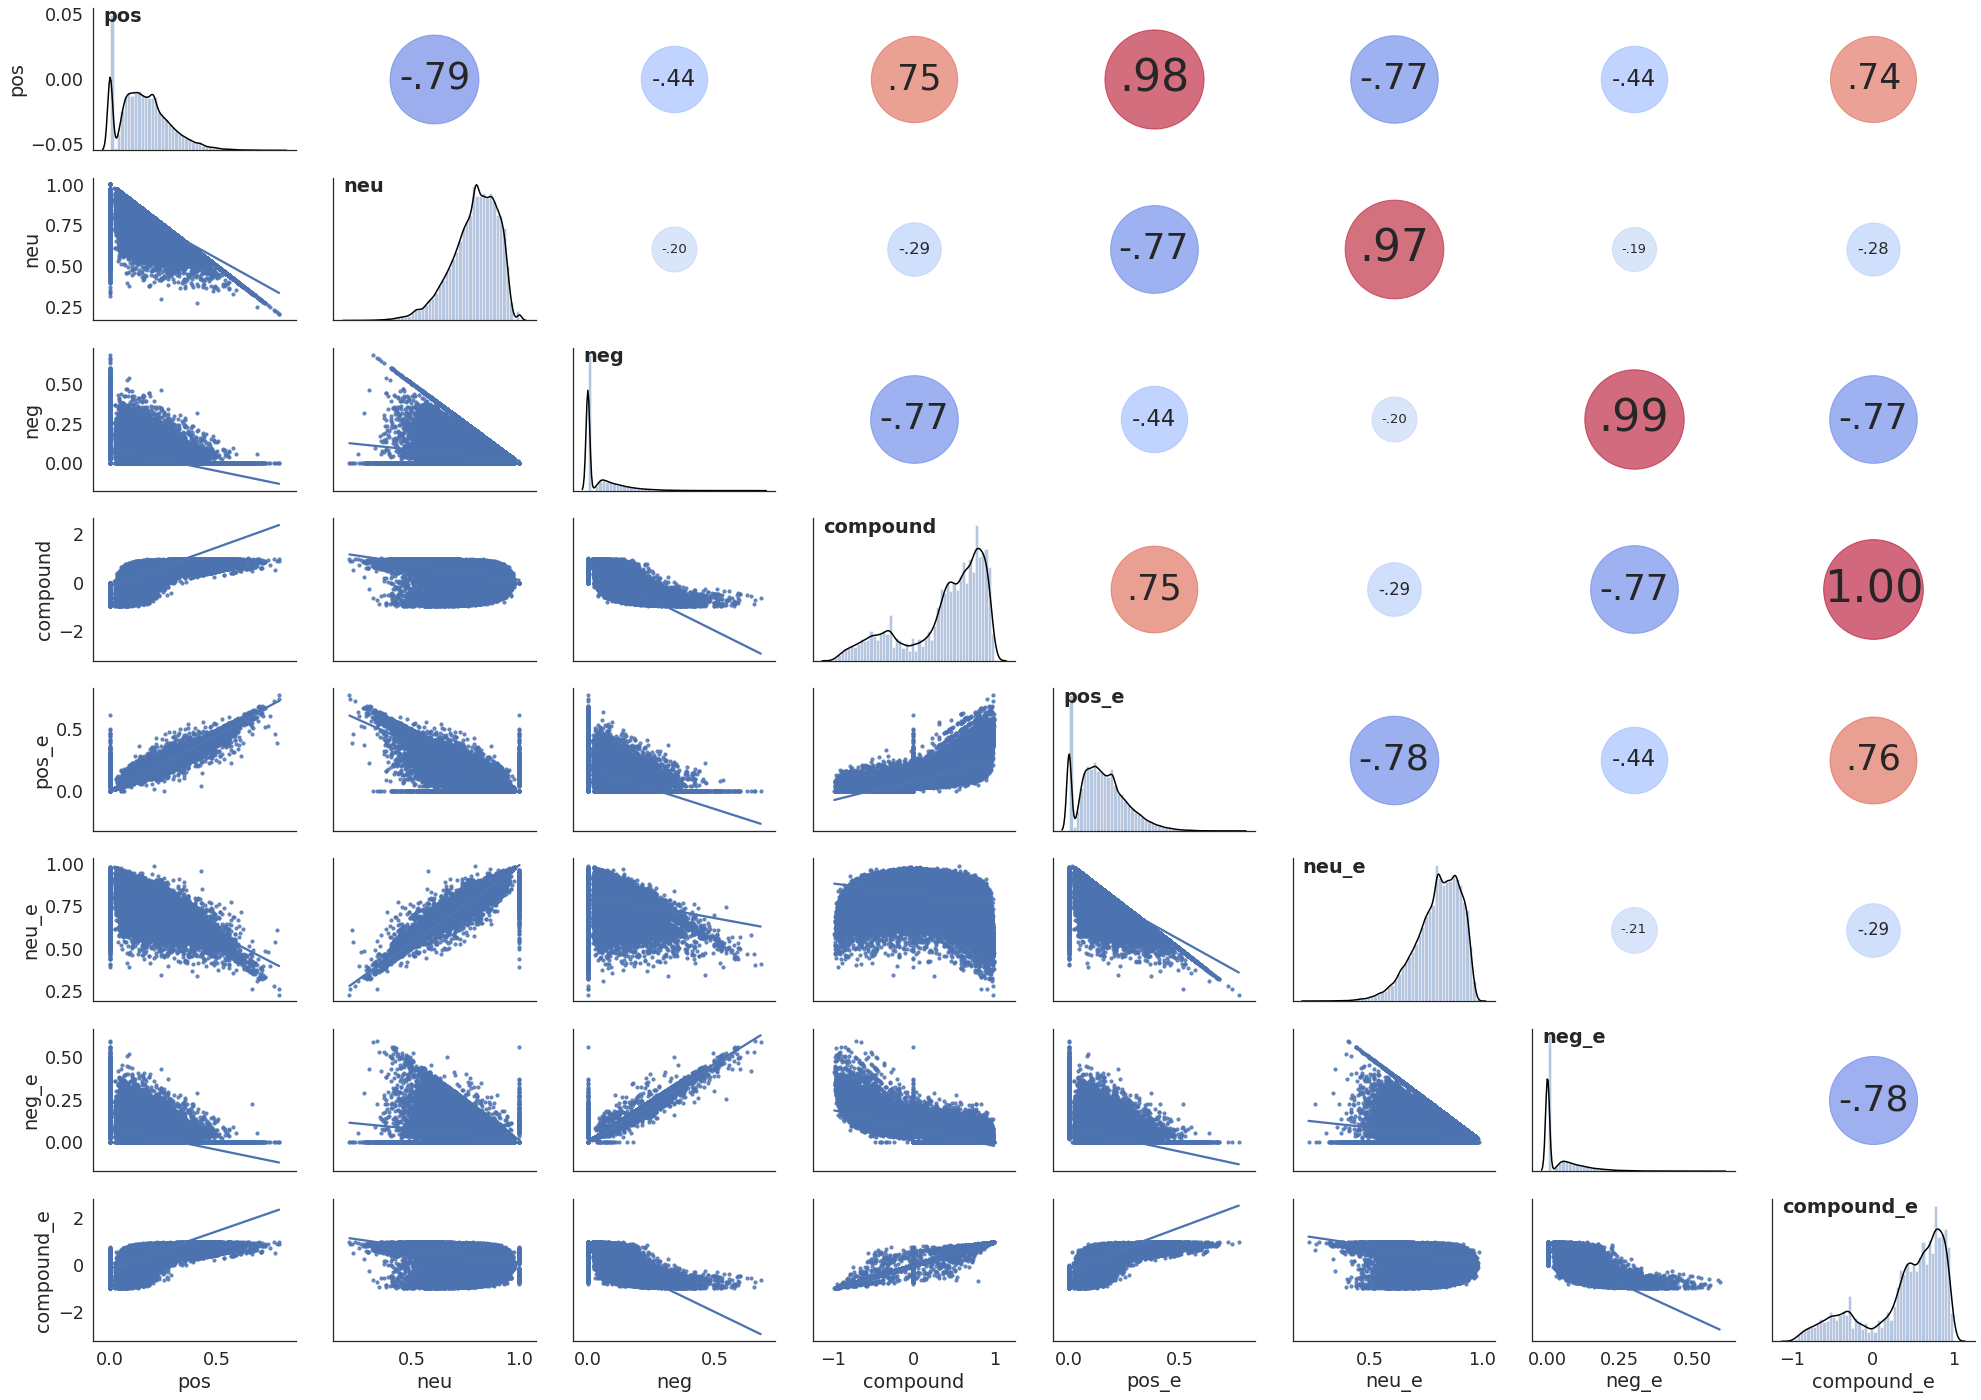

In [60]:
# Crazy plots
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_trimmed, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, scatter_kws={'s':10})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_diag(annotate_colname)
g.map_upper(corrdot) 
plt.show()

## Sweetviz for comparisons

In [ ]:
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].replace("['ABA']", np.nan)
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].replace("['たてたてよこよこ横山結衣', 'ディズニーランド', 'Disney', '初調査員', 'あべこうじ', '横山結衣', '中村かさね', '藤原祐輝', '木邨将太', '服部未佳', '土曜日', '９時３５分', '青森', '夢はここから', '生放送', 'ハッピィ', '土曜日', '9時35分', 'ABA', '青森朝日放送', 'aomori']", np.nan)
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].replace("['RT', 'ABA']", np.nan)
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].replace("['Aba', 'SelfDefenceIsLegal']", np.nan)
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].replace("['LatinosInMedicine', 'LatinxInMedicine', 'MedTwitter', 'PeruvianPhysiciansCrew']", np.nan)
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].replace("['MedTwitter', 'MedStudentTwitter', 'MedEd', 'AcademicChatter', 'AcademicTwitter']", np.nan)
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].replace("['StopViolenceAgainstDoctors', 'Medtwitter', 'iStandWithDoctors', 'NoToViolenceOnDoctors']", np.nan)
df_bx['inReplyToTweetId'] = df_bx['inReplyToTweetId'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Bx twitter vs. medtwitter
compare_report = sv.compare([df_bx, "Behavior Twitter"], [df_med, "Med Twitter"])
compare_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Lazypredict

In [ ]:
try:
  from lazypredict.Supervised import LazyClassifier, LazyRegressor
  from sklearn.model_selection import train_test_split
except:
  !pip install lazypredict

In [ ]:
# Fit LazyRegressor
reg = LazyClassifier(verbose=1, random_state=1121218,predictions=True)

In [ ]:
# Tweets without emoji conversion
y = df_clean['compound']
X = df_clean.drop(['compound', 'compound_e', 'pos_e', 'neu_e', 'neg_e', 'neu', 'pos', 'neg'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8675309)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [05:12<00:00, 10.76s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


In [ ]:
# Tweets with emoji conversion
y_e = df_clean['compound_e']
X = df_clean.drop(['compound', 'compound_e', 'pos_e', 'neu_e', 'neg_e', 'neu', 'pos', 'neg'], axis=1)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y_e, test_size=0.2, random_state=8675309)
models_e, predictions_e = reg.fit(X_train, X_test, y_train_e, y_test_e)
models_e

100%|██████████| 29/29 [00:00<00:00, 38010.88it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


## Change in sentiment over time

In [11]:
# Make sure all datetimes are as they need to be
df_bx = df_bx.reset_index(drop=True)
new_date = []
for i in range(len(df_bx)):
  date = df_bx['date'][i]
  try:
    val = pd.to_datetime(date)
    new_date.append(val)
  except:
    print(date)
    new_val = input()
    new_val = pd.to_datetime(new_val)
    new_date.append(new_val)

df_bx['date'] = new_date

0
01/01/2015
0
01/01/2015
0
01/01/2015
1
01/01/2015
0
01/01/2015
1
01/01/2015
0
01/01/2015
1
01/01/2015
0
01/01/2015
0
01/01/2015
1
01/01/2015
0
01/01/2015


In [51]:
# Sort dfs by date for plotting
# behavior analysis
df_bx = df_bx.sort_values(by=['date'])
df_bx = df_bx.dropna(subset=['date'])
df_bx = df_bx.reset_index(drop=True)

# med
df_med = df_med.sort_values(by=['date'])
df_med = df_med.dropna(subset=['date'])
df_med = df_med.reset_index(drop=True)

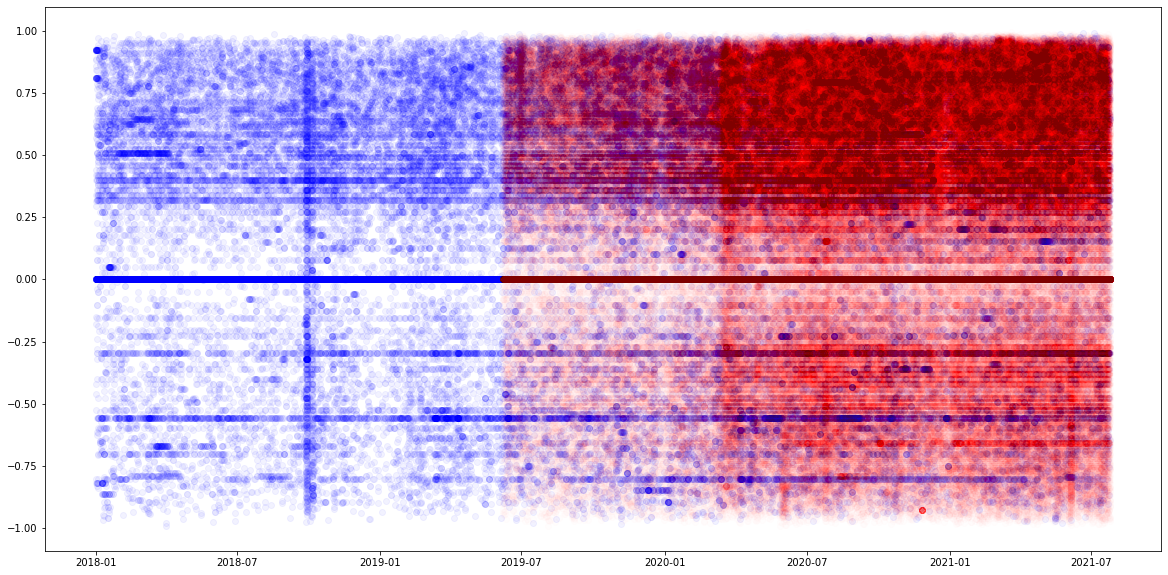

In [87]:
# Plot them
plt.figure(figsize=(20,10))
plt.scatter(x=df_bx['date'], y=df_bx['compound'], color='blue', alpha=0.05)
plt.scatter(x=df_med['date'], y=df_med['compound'], color='red', alpha=0.007)
plt.show()

In [26]:
# Aggregate by month and year
def aggregate(df):
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
  df['year'] = pd.DatetimeIndex(df['date']).year
  df['month'] = pd.DatetimeIndex(df['date']).month
  testing = df.groupby(by=['year', 'month']).mean()
  testing = testing.reset_index()
  testing['year'] = testing['year'].astype(str)
  testing['month'] = testing['month'].astype(str)
  testing['year_month'] = testing['year'] + "-" + testing['month']
  return testing

agg_bx = aggregate(df_bx)
agg_med = aggregate(df_med)

In [27]:
agg_bx = agg_bx.drop(0).reset_index(drop=True)

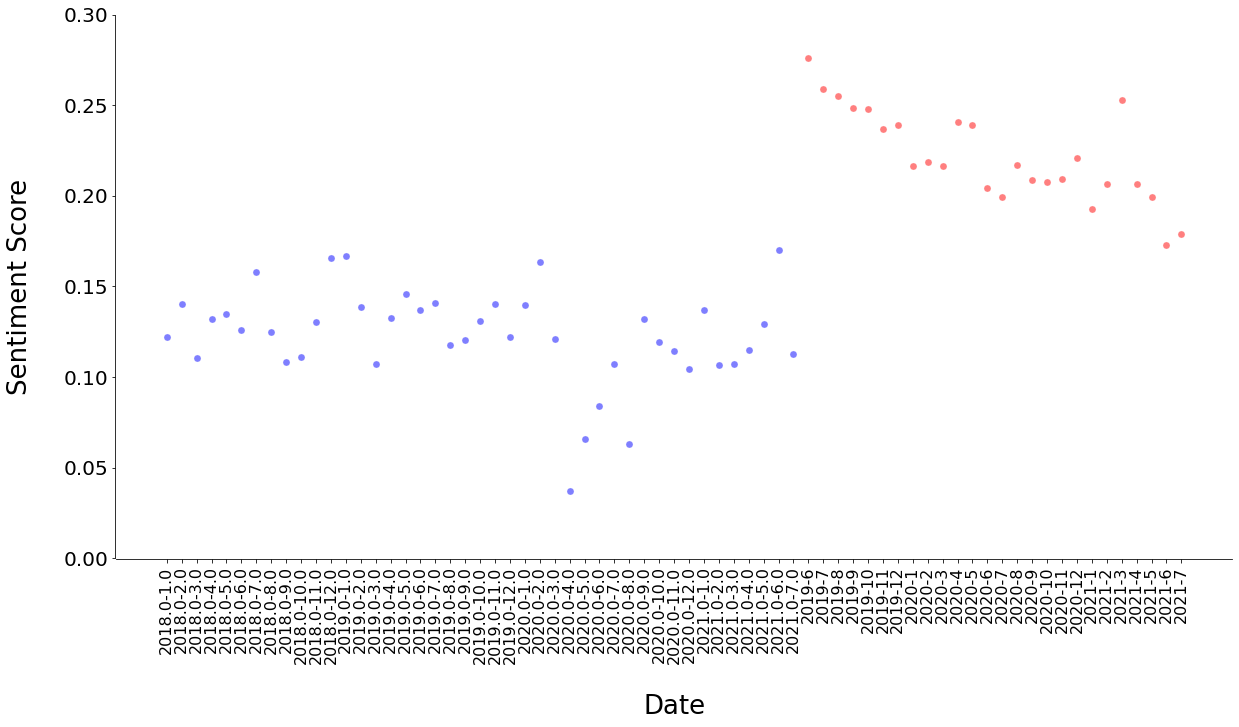

In [28]:
# Plot them
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=agg_bx['year_month'], y=agg_bx['compound'], color='blue', s=50, alpha=0.5)
sns.scatterplot(x=agg_med['year_month'], y=agg_med['compound'], color='red', s=50, alpha=0.5)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=True, trim=False)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
plt.ylim(0, 0.3)
plt.yticks(fontsize=20)
plt.ylabel('Sentiment Score', fontsize=26, labelpad=30)
plt.xlabel('Date', fontsize=26, labelpad=30)
plt.xticks(rotation=90, fontsize=16)
plt.show()

In [81]:
df_bx[]

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
105152    2021
105153    2021
105154    2021
105155    2021
105156    2021
Name: year, Length: 105157, dtype: int64